In [1]:
import warnings

warnings.filterwarnings("ignore")
# libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pd.options.display.max_columns=200
#pd.options.display.max_rows=200

In [2]:
# loading the dataset
cc=pd.read_csv("data_credit_card_customer_seg.csv")
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#df.dropna(subset=['Name'])

cc=cc.dropna(subset=["CREDIT_LIMIT"])

# dropping the one row of null value.

cc["MINIMUM_PAYMENTS"]=cc["MINIMUM_PAYMENTS"].fillna(0)

In [4]:
# null values
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
# Making a dataset of customers that pay in EMI
'''
#ccnull[ccnull["MINIMUM_PAYMENTS"].isnull() & ccnull["PAYMENTS"]!=0]
# Giving Error
'''
# df.loc[(df.C > 0.25) | (df.C < -0.25)]

cc_emi=cc.loc[(cc.TENURE==12) & (cc.PURCHASES_TRX==12) & (cc.INSTALLMENTS_PURCHASES!=0)].reset_index(drop=True) 

In [6]:
# DAta Set of EMI Customers.
cc_emi.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10008,1823.652743,1.0,436.20,0.0,436.20,0.0,1.0,0.0,1.0,0.0,0,12,2300.0,679.065082,532.033990,0.0,12
1,C10011,1293.124939,1.0,920.12,0.0,920.12,0.0,1.0,0.0,1.0,0.0,0,12,1200.0,1083.301007,2172.697765,0.0,12
2,C10020,3577.970933,1.0,398.64,0.0,398.64,0.0,1.0,0.0,1.0,0.0,0,12,4000.0,1053.980464,12465.549380,0.0,12
3,C10026,169.781679,1.0,399.60,0.0,399.60,0.0,1.0,0.0,1.0,0.0,0,12,3000.0,215.306142,163.005536,0.0,12
4,C10028,125.694817,1.0,233.28,0.0,233.28,0.0,1.0,0.0,1.0,0.0,0,12,1000.0,207.773715,164.748819,0.0,12


In [7]:
cc_emi.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10008,1823.652743,1.0,436.20,0.0,436.20,0.0,1.0,0.0,1.0,0.0,0,12,2300.0,679.065082,532.033990,0.0,12
1,C10011,1293.124939,1.0,920.12,0.0,920.12,0.0,1.0,0.0,1.0,0.0,0,12,1200.0,1083.301007,2172.697765,0.0,12
2,C10020,3577.970933,1.0,398.64,0.0,398.64,0.0,1.0,0.0,1.0,0.0,0,12,4000.0,1053.980464,12465.549380,0.0,12
3,C10026,169.781679,1.0,399.60,0.0,399.60,0.0,1.0,0.0,1.0,0.0,0,12,3000.0,215.306142,163.005536,0.0,12
4,C10028,125.694817,1.0,233.28,0.0,233.28,0.0,1.0,0.0,1.0,0.0,0,12,1000.0,207.773715,164.748819,0.0,12


In [8]:
cc_emi.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [10]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [12]:
cck =cc_emi[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

# instantiate
scaler = StandardScaler()

# fit_transform
cck_scaled = scaler.fit_transform(cck)
cck_scaled.shape

(449, 17)

In [13]:
pca = PCA(n_components = 2) 
cck_scaled_pr = pca.fit_transform(cck_scaled) 
cck_scaled_pr = pd.DataFrame(cck_scaled_pr) 
cck_scaled_pr.columns = ['P1', 'P2'] 


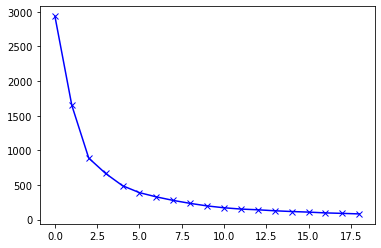

In [14]:
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(cck_scaled_pr)
    cost.append(kmean.inertia_)  
   
plt.plot(cost, 'bx-')

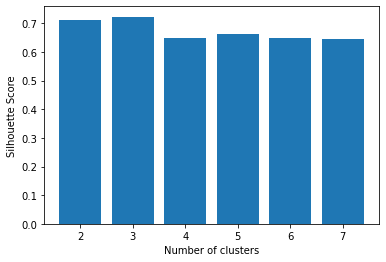

In [15]:
silhouette_scores = [] 
for n_cluster in range(2, 8):
    silhouette_scores.append(   
        silhouette_score(cck_scaled_pr, KMeans(n_clusters = n_cluster).fit_predict(cck_scaled_pr))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()    

In [ ]:
#Applying k-Means with cluster as 3

In [16]:
db_default = KMeans(n_clusters=3, init='k-means++').fit(cck_scaled_pr) 
labels = db_default.labels_  

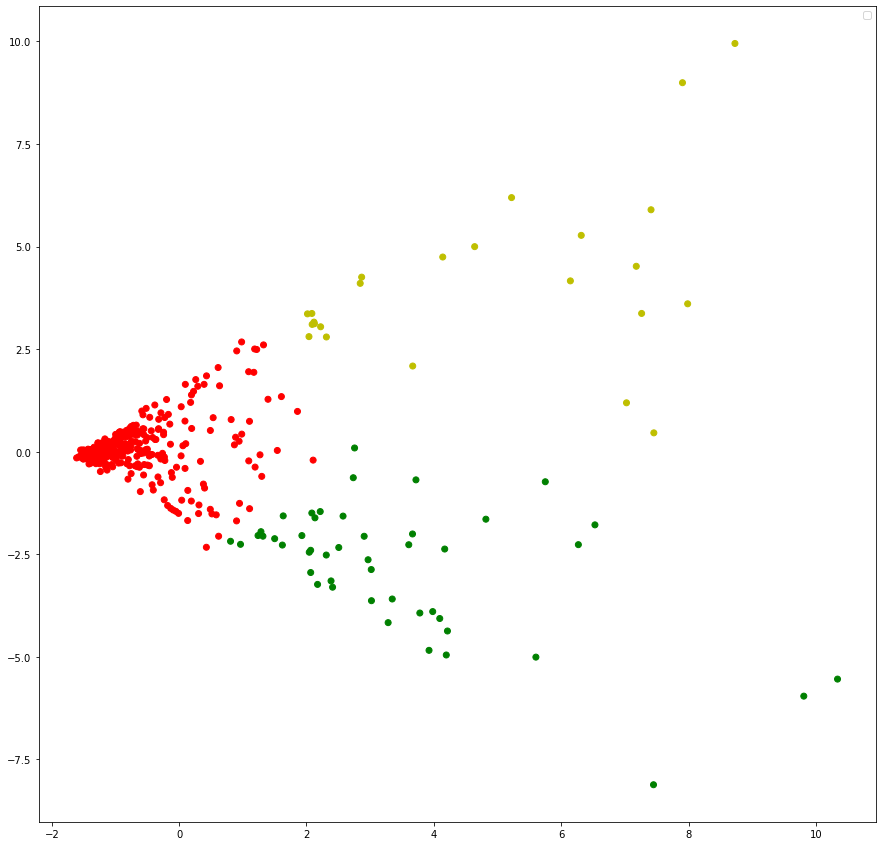

In [17]:
colours = {} 
colours[0] = 'r'
colours[1] = 'y'
colours[2] = 'g'
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
#r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
#y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
#g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(15, 15))  
plt.scatter(cck_scaled_pr['P1'], cck_scaled_pr['P2'], c = cvec) 
  
# Building the legend 
plt.legend(('r', 'y', 'g'), ('Label 0','Label 1','Label 2')) 
#plt.legend(('r', 'y'), ('Label 0','Label 1')) 

plt.show() 

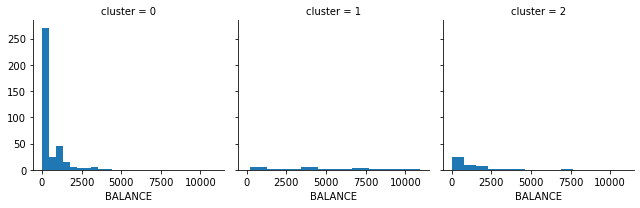

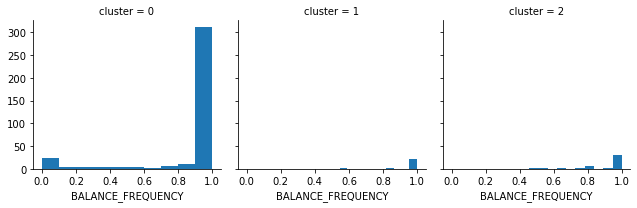

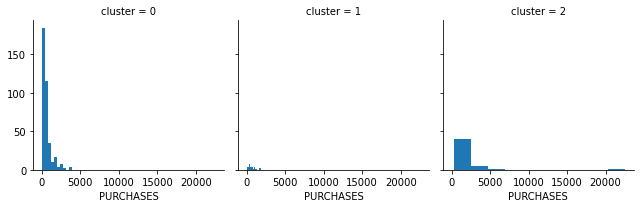

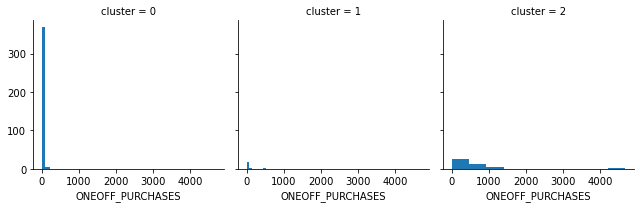

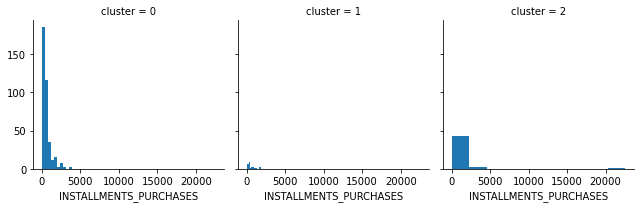

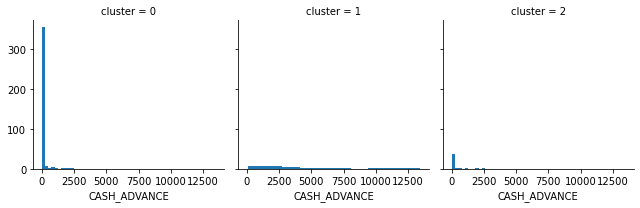

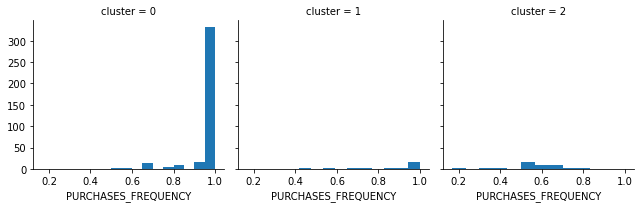

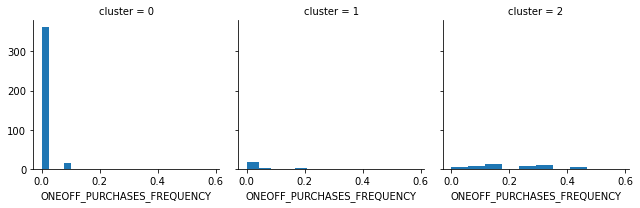

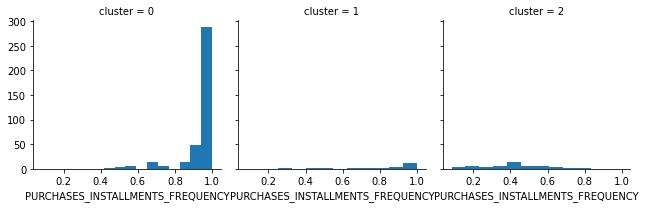

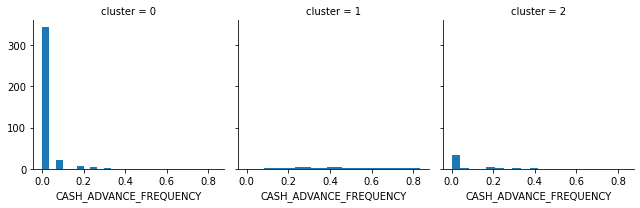

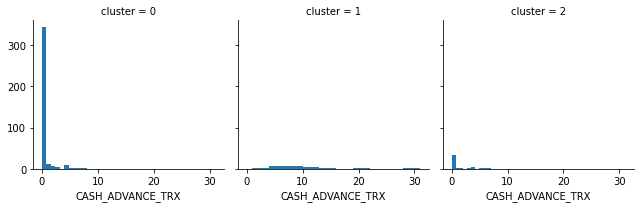

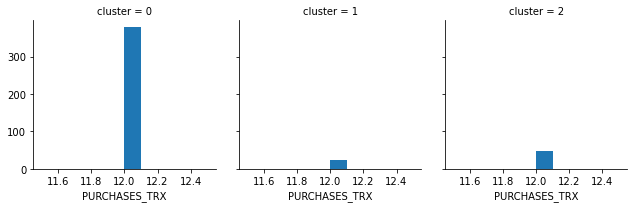

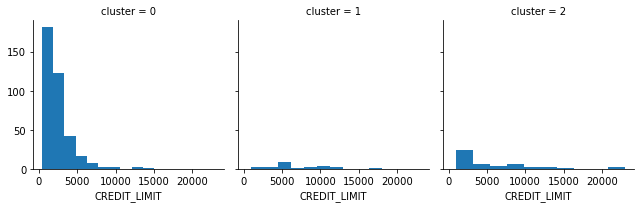

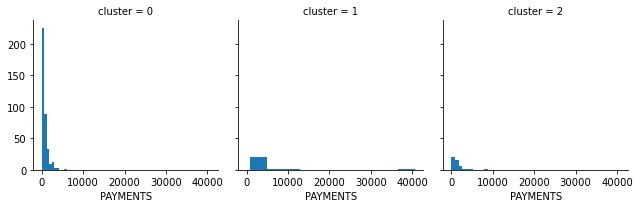

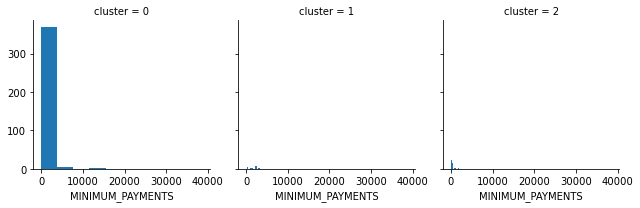

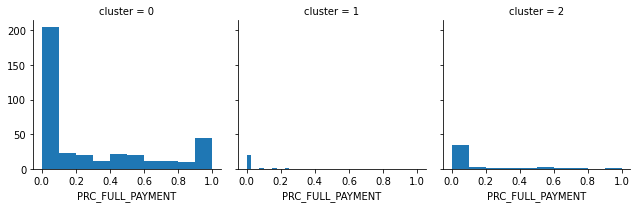

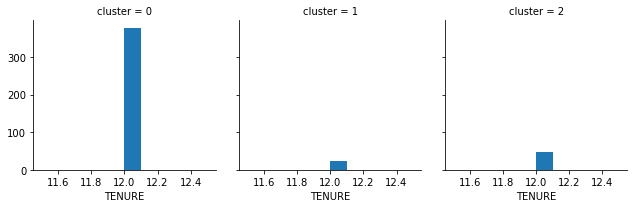

In [18]:
clusters=pd.concat([cck, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

for cols in cck:
    g = sns.FacetGrid(clusters, col = 'cluster')
    g.map(plt.hist, cols)